In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import scipy.stats as stats
from scipy.stats import norm, skew
from math import sqrt

In [2]:
random_state = np.random.RandomState(42)

In [3]:
df = pd.read_csv('data/train_model_final.csv')

In [4]:
df2 = pd.read_csv('data/test_model_final.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2051 non-null   int64  
 1   id                2051 non-null   int64  
 2   lot_frontage      2051 non-null   float64
 3   lot_area          2051 non-null   int64  
 4   overall_qual      2051 non-null   int64  
 5   mas_vnr_area      2051 non-null   float64
 6   bsmt_qual         2051 non-null   int64  
 7   total_bsmt_sf     2051 non-null   float64
 8   gr_liv_area       2051 non-null   int64  
 9   totrms_abvgrd     2051 non-null   int64  
 10  garage_cars       2051 non-null   float64
 11  garage_qual       2051 non-null   int64  
 12  garage_cond       2051 non-null   int64  
 13  saleprice         2051 non-null   int64  
 14  total_baths       2051 non-null   float64
 15  has_bsmt          2051 non-null   int64  
 16  has_fireplace     2051 non-null   int64  


In [6]:
df.shape

(2051, 55)

In [7]:
df.head()

,Unnamed: 0,id,lot_frontage,lot_area,overall_qual,mas_vnr_area,bsmt_qual,total_bsmt_sf,gr_liv_area,totrms_abvgrd,...,house_type_1Fam,house_type_2_fam,house_type_Twnhs,fnd_BrkTil,fnd_CBlock,fnd_PConc,house_age,remod_age,new_house,new_remod
0,0,109,69.0552,13517,6,289.0,3,725.0,1479,6,...,1,0,0,0,1,0,34,5,0,1
1,1,544,43.0000,11492,7,132.0,4,913.0,2122,8,...,1,0,0,0,0,1,13,12,0,0
2,2,153,68.0000,7922,5,0.0,3,1057.0,1057,5,...,1,0,0,0,1,0,57,3,0,1
3,3,318,73.0000,9802,5,0.0,4,384.0,1444,7,...,1,0,0,0,0,1,4,3,1,1
4,4,255,82.0000,14235,6,0.0,2,676.0,1445,6,...,1,0,0,0,0,1,110,17,0,0


In [8]:
df2.shape

(878, 57)

In [9]:
df2.head()

,Unnamed: 0,id,lot_frontage,lot_area,overall_qual,mas_vnr_area,bsmt_qual,total_bsmt_sf,gr_liv_area,kitchen_qual,...,house_type_Twnhs,fnd_BrkTil,fnd_CBlock,fnd_PConc,sale_new_house,remod_add,house_age,remod_age,new_house,new_remod
0,0,2658,69.000000,9142,6,0.0,2,1020,1928,Fa,...,0,0,0,0,0,0,96,56,0,0
1,1,2718,69.545961,9662,5,0.0,4,1967,1967,TA,...,0,0,1,0,0,0,29,29,0,0
2,2,2414,58.000000,17104,7,0.0,4,654,1496,Gd,...,0,0,0,1,1,0,0,0,1,1
3,3,1989,60.000000,8520,5,0.0,3,968,968,TA,...,0,0,1,0,0,0,84,1,0,1
4,4,625,69.545961,9500,6,247.0,4,1394,1394,TA,...,0,0,1,0,0,0,46,46,0,0


In [10]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [11]:
df2.drop(df2.columns[df2.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

## Model Prep

In [12]:
X = df.loc[:, df.columns !='']
features = list(X.columns)
y = df['saleprice']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,id,lot_frontage,lot_area,overall_qual,mas_vnr_area,bsmt_qual,total_bsmt_sf,gr_liv_area,totrms_abvgrd,garage_cars,...,house_type_1Fam,house_type_2_fam,house_type_Twnhs,fnd_BrkTil,fnd_CBlock,fnd_PConc,house_age,remod_age,new_house,new_remod
226,973,69.0552,4500,6,425.0,5,1224.0,1224,5,2.0,...,0,0,1,0,0,1,10,10,1,1
1742,482,69.0552,8174,7,0.0,4,698.0,1342,7,2.0,...,1,0,0,0,0,1,6,6,1,1
1516,791,68.0000,9571,5,0.0,3,1276.0,1276,5,1.0,...,1,0,0,0,1,0,51,51,0,0
1568,2233,50.0000,7000,6,0.0,3,720.0,1215,6,2.0,...,1,0,0,1,0,0,67,57,0,0
862,1793,75.0000,8778,8,0.0,4,1302.0,1830,7,3.0,...,1,0,0,0,0,1,1,1,1,1


### Baseline RMSE

In [61]:
baseline = mean_squared_error(y_test, [y_train.mean()]*len(y_test), squared=False)
baseline

68634.37747625775

In [14]:
for dataset in [X_train, X_test, y_train, y_test]:
    print(dataset.shape)

(1435, 53)
(616, 53)
(1435,)
(616,)


In [15]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [16]:
ss.mean_

array([1.45968362e+03, 6.93854234e+01, 9.91021324e+03, 6.09756098e+00,
       9.92526316e+01, 3.48571429e+00, 1.05724459e+03, 1.46929756e+03,
       6.40487805e+00, 1.77282230e+00, 2.80557491e+00, 2.81393728e+00,
       2.21910697e+00, 9.72822300e-01, 5.01045296e-01, 8.34843206e-01,
       4.15331010e-01, 1.32404181e-02, 2.09059233e-03, 9.75609756e-03,
       4.11149826e-02, 1.32404181e-02, 8.57142857e-02, 3.41463415e-02,
       6.62020906e-02, 5.85365854e-02, 1.39372822e-03, 3.55400697e-02,
       1.18466899e-02, 3.90243902e-02, 1.43554007e-01, 1.04529617e-02,
       4.87804878e-02, 2.43902439e-02, 5.29616725e-02, 7.24738676e-02,
       1.25435540e-02, 5.85365854e-02, 4.52961672e-02, 6.96864111e-02,
       1.81184669e-02, 2.22996516e-02, 6.96864111e-03, 8.27177700e-01,
       5.64459930e-02, 1.16376307e-01, 1.05923345e-01, 4.18815331e-01,
       4.56445993e-01, 3.58919861e+01, 2.36634146e+01, 3.08013937e-01,
       4.10452962e-01])

In [17]:
ss.scale_

array([8.38247465e+02, 2.21503188e+01, 5.38642330e+03, 1.43484304e+00,
       1.75892090e+02, 9.04675098e-01, 4.58680880e+02, 4.61289060e+02,
       1.56969689e+00, 7.61412620e-01, 7.18474672e-01, 7.12907994e-01,
       8.18019953e-01, 1.62600962e-01, 4.99998907e-01, 3.71322000e-01,
       4.92779020e-01, 1.14302710e-01, 4.56751766e-02, 9.82899594e-02,
       1.98556140e-01, 1.14302710e-01, 2.79941685e-01, 1.81604980e-01,
       2.48635021e-01, 2.34755306e-01, 3.73066448e-02, 1.85140415e-01,
       1.08195868e-01, 1.93653007e-01, 3.50636926e-01, 1.01703969e-01,
       2.15408802e-01, 1.54257447e-01, 2.23956991e-01, 2.59270913e-01,
       1.11293366e-01, 2.34755306e-01, 2.07952938e-01, 2.54617783e-01,
       1.33379864e-01, 1.47656280e-01, 8.31870131e-02, 3.78093576e-01,
       2.30780941e-01, 3.20675633e-01, 3.07739484e-01, 4.93365027e-01,
       4.98099436e-01, 3.01346832e+01, 2.09335506e+01, 4.61672342e-01,
       4.91915976e-01])

In [18]:
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

## Linera Regression  Model

In [20]:
lr = LinearRegression()

In [22]:
cross_val_score(estimator=lr, X=X_train, y=y_train).mean()

0.6163244635106601

In [23]:
# Fit the model 
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

In [31]:
lr.score(X_train, y_train)
print(f' Linear Regression Train Score is: {lr.score(X_train, y_train)}')

 Linear Regression Train Score is: 0.6660616769492547


In [32]:
lr.score(X_test, y_test)
print(f' Linear Regression Test Score is: {lr.score(X_test, y_test)}')

 Linear Regression Test Score is: 0.6750872851947647


### RMSE

In [38]:
RMSE_lr_train = sqrt(mean_squared_error(y_train, train_preds))
print(f' Linear Regression Train RMSE: {RMSE_lr_train}')

 Linear Regression Train RMSE: 38024.76814989392


In [39]:
RMSE_lr_test = sqrt(mean_squared_error(y_test, test_preds))
print(f' Linear Regression Train RMSE: {RMSE_lr_test}')

 Linear Regression Train RMSE: 39068.43562861566


In [42]:
cross_val_score(estimator=lr, X=X_train, y=y_train, cv=6).mean()

0.6248922420256514

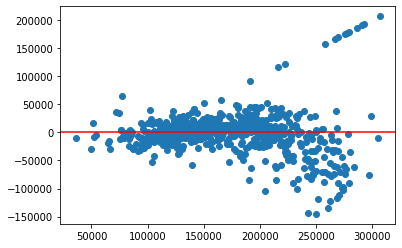

In [43]:
plt.scatter(test_preds, test_preds - y_test)
plt.axhline(0, color='red');

In [277]:
df2['saleprice'] = lr.predict(df2[ridge_features])
df2[['id','saleprice']].set_index('id').to_csv('linear_regression_kaggle.csv')

## Ridge Model

In [44]:
rl = Ridge(alpha=1.0)
rl.fit(X_train_sc, y_train)

Ridge()

In [45]:
cross_val_score(estimator=rl, X=X_train_sc, y=y_train).mean()

0.6202236418501342

In [48]:
y_preds = rl.predict(X_test_sc)
X_preds = rl.predict(X_train_sc)

In [65]:
rl.score(X_train_sc, y_train)
print(f' Ridge Regression Train Score is: {rl.score(X_train_sc, y_train)}')

 Ridge Regression Train Score is: 0.6659657687766632


In [66]:
rl.score(X_test_sc, y_test)
print(f' Ridge Regression Test Score is: {rl.score(X_test_sc, y_test)}')

 Ridge Regression Test Score is: 0.6750808340705272


In [49]:
# RMSE
RMSE_rl_train = sqrt(mean_squared_error(y_train, X_preds))
print(f' Linear Regression Train RMSE: {RMSE_lr_train}')

 Linear Regression Train RMSE: 38024.76814989392


In [50]:
RMSE_rl_test = sqrt(mean_squared_error(y_test, y_preds))
print(f' Linear Regression Train RMSE: {RMSE_rl_test}')

 Linear Regression Train RMSE: 39068.82347752014


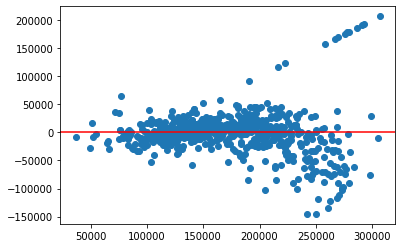

In [55]:
plt.scatter(y_preds, y_preds - y_test)
plt.axhline(0, color='red');

In [285]:
#df2['saleprice'] = lr.predict(df2[ridge_features])
#df2[['id','saleprice']].set_index('id').to_csv('ridge_regression_kaggle.csv')

## LASSO Model

In [63]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train_sc, y_train)

C:\Users\domin_lxdhy\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233875080821.53186, tolerance: 621324942.8185669
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [64]:
lasso_y_preds = lasso.predict(X_test_sc)
lasso_X_preds = lasso.predict(X_train_sc)

In [67]:
lasso.score(X_train_sc, y_train)
print(f' Lasso Train Score is: {lasso.score(X_train_sc, y_train)}')

 Lasso Train Score is: 0.6660569959123523


In [68]:
lasso.score(X_test_sc, y_test)
print(f' Lasso Test Score is: {lasso.score(X_test_sc, y_test)}')

 Lasso Test Score is: 0.6750889705869677


In [69]:
# RMSE
RMSE_lasso_X = sqrt(mean_squared_error(y_train, lasso_X_preds))
print(f' Linear Regression Train RMSE: {RMSE_lasso_X}')

 Linear Regression Train RMSE: 38025.03465826817


In [74]:
RMSE_lasso_y = sqrt(mean_squared_error(y_test, lasso_y_preds))
print(f' Linear Regression Test RMSE: {RMSE_lasso_y}')

 Linear Regression Test RMSE: 39068.33430029088


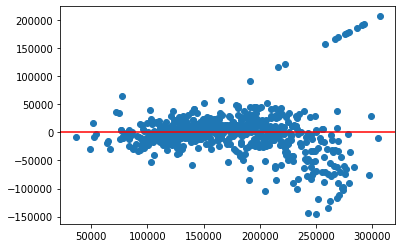

In [72]:
plt.scatter(lasso_y_preds, lasso_y_preds - y_test)
plt.axhline(0, color='red');

In [73]:
pd.DataFrame(list(zip(features, lr.coef_)), columns=['Feature', 'Coefficient']).sort_values(by='Coefficient',
                                                                                               ascending=False)

,Feature,Coefficient
14,has_fireplace,14934.061797
3,overall_qual,10751.566090
13,has_bsmt,9098.486013
9,garage_cars,7806.731825
12,total_baths,7714.095198
15,has_porch,6423.467589
43,house_type_1Fam,4625.916030
11,garage_cond,4175.007778
52,new_remod,2813.386526
51,new_house,1469.790121


# Conclusions

 - Baseline RMSE: 68540.0

 - Linear model RMSE: 39068.43562861566
 - Ridge model RMSE: 39068.82347752014
 - LASSO model RMSE: 39068.22571364279 

When comparing the three models and their RMSE, the Lasso model had the lowest RMSE score (very small difference). The high RMSE score most likely means that the models were overfitted. However, compared to the baseline, the models had the smaller RMSE. I believe the models would make a better prediction if the neighboorhood feature was not dummified since it only added numerous uncorrelated variables that decreased the effectives of the models. 

The variable that is most reliable feature that increases the sale price is above grade (ground) living area square feet, 'gr_liv_area. That would be expected as the sale price of real estate property is strongly corrareled with its living space. The neighborhoods had the lower correlation with the price as well as having a second floor. We can confidently conclude that home buyers prefer one level houses with larger lviing area.


Other variables such as pool or basement made little to no difference in the prediction. Having a basement or its ordinal features made little difference when predicting the price since almost every house in the data had a basement. Pool was the opposite, it was a feature only a few houses had.